# Titanic Data Analysis

Analysis of Titanic passenger data obtained from https://www.kaggle.com/c/titanic/data

## Questions to be investigated:

   
1. Plot survival rates by age bracket (i.e. 0-3, 4-12, 13-21, 22-35, 36-50, 51-65, 66+).
2. What fraction of survivors were from which 'pclass'? Vice versa for those who perished.
3. Plot 'age' vs 'fare' as scatter plot.
4. No. of siblings/spouse OR parents/children vs survival?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

Load csv into pandas dataframe, then check for incomplete data/incorrect formatting.

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

It appears the 'Age' data has some missing values. Will remove the rows with a missing 'Age' value from the dataset.

In [5]:
titanic_data.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [6]:
titanic_data.sort_values(by='Age').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


From the tail() call we can see that the missing 'Age' values are attributed 'NaN'. Even though these values will be ignored when taking means etc, I'll remove them from the dataframe to work with complete passenger data only.

In [10]:
# remove rows with NaN in the 'Age' column
titanic_data = titanic_data.dropna(axis=0, subset=['Age'])

In [11]:
titanic_data.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

Now all columns except 'Cabin' and 'Embarked' have 714 rows with complete data. As I will not be using 'Cabin' or 'Embarked' this data should be clean enough to start the analysis.

However, will first check for extreme outliers in the numerical data by calling the describe() method

In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


The 'max' and 'min' values seem reasonable for each category. The 'min' for 'Fare' is 0, but perhaps some passengers got complimentary tickets, so this will not be changed.

Lastly, will check the data types are in the correct format before starting the analysis.

In [14]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

These all appear correct, with the numerical data as 'int64' or 'float64' and the non-numerical data as 'object' (strings).

## Question 1: Effect of age on survival rate
### Sort data into age brackets as per Q1.

In [15]:
titanic_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,440.199234,0.754789,2.065134,27.915709,0.639847,0.708812,47.582759
male,453.412804,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836


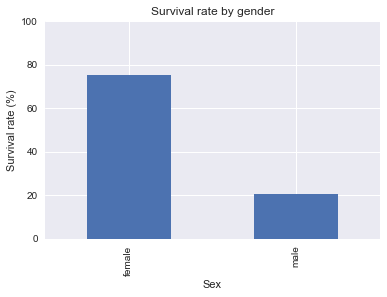

In [16]:
survival_by_sex = titanic_data.groupby('Sex').mean()['Survived']
percentage_survival_by_sex = survival_by_sex * 100
percentage_survival_by_sex.plot(kind='bar', ylim=(0,100))
plt.title('Survival rate by gender')
plt.ylabel('Survival rate (%)')
plt.show()

Used stack overflow to find how to set y-axis values, see ref 1.

In [17]:
def sort_age(age):
    if age <= 3:
        return 'infant'
    elif 4 <= age <= 12:
        return 'child'
    elif 13 <= age <= 21:
        return 'teen'
    elif 22 <= age <= 35:
        return 'aldult'
    elif 36 <= age <= 50:
        return 'middle aged'
    elif 51 <= age <= 65:
        return 'over 50'
    elif age >= 66:
        return 'elderly'

In [18]:
age_sorted_titanic_data = titanic_data['Age'].apply(sort_age)

In [19]:
merged_age_sorted_data = titanic_data.merge(age_sorted_titanic_data.to_frame('age_group'), left_index=True, right_index=True)

Used to_frame() method to convert the Pandas Series to a DataFrame so that it could be merged with the main dataset. Used ref 2 for info.

Also used Pandas docs for merge() function, see ref 3.

In [20]:
merged_age_sorted_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,aldult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,aldult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,aldult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,aldult


### Now, can group by the age bracket as defined by the function sort_age()

In [21]:
titanic_data_by_age_group = merged_age_sorted_data.groupby('age_group')

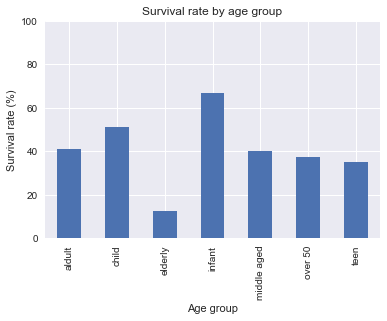

In [22]:
survival_by_age_group = titanic_data_by_age_group.mean()['Survived']
percentage_survival_by_age_group = survival_by_age_group * 100
percentage_survival_by_age_group.plot(kind='bar', ylim=(0,100))
plt.title('Survival rate by age group')
plt.ylabel('Survival rate (%)')
plt.xlabel('Age group')
plt.show()

### Want to divide this data further into male and female to see if gender played a larger role in certain age brackets.

In [23]:
# create grouped by age and gender
by_age_group_and_gender = merged_age_sorted_data.groupby(['age_group', 'Sex'], as_index=False).mean()

# want survival as a percentage
percentage_survival_by_age_and_gender = by_age_group_and_gender['Survived'] * 100

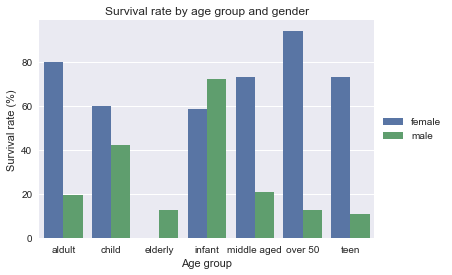

In [24]:
# use seaborn module to plot bar chart
sns.barplot(x='age_group', y=percentage_survival_by_age_and_gender, hue='Sex', data=by_age_group_and_gender)
plt.title('Survival rate by age group and gender')
plt.ylabel('Survival rate (%)')
plt.xlabel('Age group')

# note: searched matplotlib docs to find how to re-position legend outside of plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Plot analysis:
This shows more clealy the differences between gender with age. Children and infants have survival rates that are similar between gender, while the older male passengers all have much lower survival rates than their female counterparts. 'Females over 50' had the highest rate of survival.

## Question 1 conclusion
Perhaps surprisingly, infants (< 3 years old) have one of the highest rates of survival. This could be due to a small sample size in this age bracket. Females had relatively constant survival rate accross all age groups (generally > 60%), while males older than 12 clearly suffer the lowest survival rate.

# Question 2: Fraction of survivors from which class?

First group by 'survived or not'. Then find count() for each class and convert to fraction (of total count). Represent as pie chart.

In [25]:
# group by whether passenger survived or not
grouped_by_survival = titanic_data.groupby(['Pclass', 'Survived']).count()

Note: searched for help indexing hierarchical dataframes, see ref 5.

In [26]:
# sum up totals for people that died/survived for all classes. Use 'PassengerId' as a proxy for 'unique' key.
total_died = grouped_by_survival.loc[1,0][1] + grouped_by_survival.loc[2,0][1] + grouped_by_survival.loc[3,0][1]
total_survived = grouped_by_survival.loc[1,1][1] + grouped_by_survival.loc[2,1][1] + grouped_by_survival.loc[3,1][1]
total_passengers = total_died + total_survived

# check calculations look correct
print "{} people died, {} people survived, out of all {} passengers.".format(total_died, total_survived, total_passengers)

424 people died, 290 people survived, out of all 714 passengers.


In [27]:
# calculate deceased fractions based on class
frac_died_from_1st_class = grouped_by_survival.loc[1,0][1] / float(total_died)
frac_died_from_2nd_class = grouped_by_survival.loc[2,0][1] / float(total_died)
frac_died_from_3rd_class = grouped_by_survival.loc[3,0][1] / float(total_died)

# check fractions add to 1
frac_died_from_1st_class + frac_died_from_2nd_class + frac_died_from_3rd_class

1.0

Note: as I'm running Python 2, need to convert one of the values to a float to ensure resulting value is also a float.

In [28]:
# calculate survivor fractions based on class
frac_survived_from_1st_class = grouped_by_survival.loc[1,1][1] / float(total_survived)
frac_survived_from_2nd_class = grouped_by_survival.loc[2,1][1] / float(total_survived)
frac_survived_from_3rd_class = grouped_by_survival.loc[3,1][1] / float(total_survived)

# check fractions add to 1
frac_survived_from_1st_class + frac_survived_from_2nd_class + frac_survived_from_3rd_class

1.0

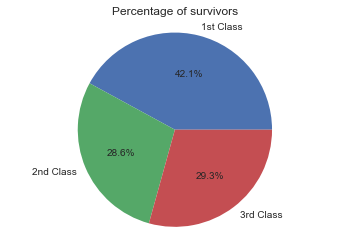

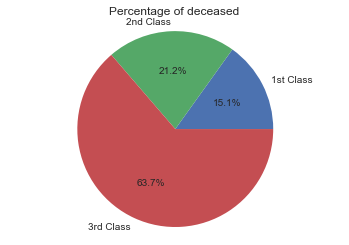

In [29]:
# survivors data
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [frac_survived_from_1st_class, frac_survived_from_2nd_class, frac_survived_from_3rd_class]

# survivors plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of survivors')
plt.show()

# deceased data
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [frac_died_from_1st_class, frac_died_from_2nd_class, frac_died_from_3rd_class]

# deceased plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of deceased')
plt.show()

note: Code for pie charts adapted from ref 6.

### Plot analysis:
These figures don't weight for the NUMBER OF PASSENGERS in each class..

Might get a better perspective by just plotting a bar chart with death/survivals for each class.

In [30]:
# get raw totals for deaths by class
total_deceased_1st_class = grouped_by_survival.loc[1,0][1]
total_deceased_2nd_class = grouped_by_survival.loc[2,0][1]
total_deceased_3rd_class = grouped_by_survival.loc[3,0][1]

In [31]:
# get raw totals for survivals by class
total_survived_1st_class = grouped_by_survival.loc[1,1][1]
total_survived_2nd_class = grouped_by_survival.loc[2,1][1]
total_survived_3rd_class = grouped_by_survival.loc[3,1][1]

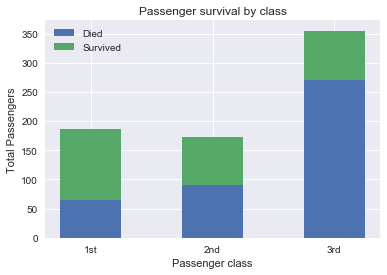

In [32]:
# plot of the passenger data by class - use stacked bar chart
deceased = (total_deceased_1st_class, total_deceased_2nd_class, total_deceased_3rd_class)
survivors = (total_survived_1st_class, total_survived_2nd_class, total_survived_3rd_class)
width = 0.5
tick_pos = [1, 2, 3]
lft_pos = [i+1 for i in range(len(deceased))]

deceased_plot = plt.bar(lft_pos, deceased, width)
survivor_plot = plt.bar(lft_pos, survivors, width,
             bottom=deceased)

plt.ylabel('Total Passengers')
plt.title('Passenger survival by class')
plt.xticks(tick_pos, ('1st', '2nd', '3rd'))
plt.legend((deceased_plot[0], survivor_plot[0]), ('Died', 'Survived'))
plt.xlabel('Passenger class')

plt.show()

Note: some code adapted from the blog in ref 7 for this stacked bar chart.

### Plot analysis:
I think this more clearly shows the effect of class on mortality rate.
We can see that the largest passenger class is 3rd, while the upper classes suffered a much higher survival rate than the lower, with 2nd Class at around 50%.

## Question 2 conclusion
The actual fraction of survivors by class is relatively evenly split between 1st, 2nd, and 3rd. However, this is due to the uneven number of total passengers in each class. This is clarified by looking at both the pie chart for non-survivors, which is dominated by 3rd Class passengers, and more explicitly by the stacked bar chart where the fraction of survivors per class shows a drastic difference between 1st and 3rd.

# Question 3: Relationship between 'age' and 'fare'

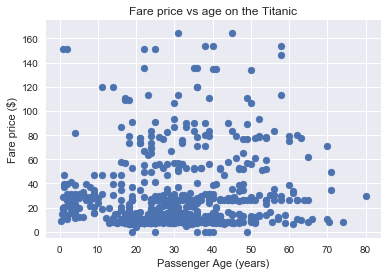

In [33]:
# plot scatter of 'Fare' vs 'Age' for all passengers.
plt.scatter(titanic_data['Age'], titanic_data['Fare'])

# outliers omitted by defining the price range (y-axis) to be less than $175
plt.ylim(-5, 175)
plt.title('Fare price vs age on the Titanic')
plt.xlabel('Passenger Age (years)')
plt.ylabel('Fare price ($)')

plt.show()

### Plot analysis:
This plot shows that age does not correlate strongly with the fare price.
However, it is interesting to observe the majority of passengers are aged between 20 and 40, and paid less than 30 dollars.

Also interesting is that there appears to be a significant amount of infants (aged < 5) onboard, some of whom even paid considerable amounts of money to join the doomed journey!

There are some data points for which 'Fare' is &#36; 0. These may be erroneous, or might be staff or other passengers that got tickest for free for some reason.

### Thought it would be interesting to see which passengers survived on this plot. Will add colour to represent this.

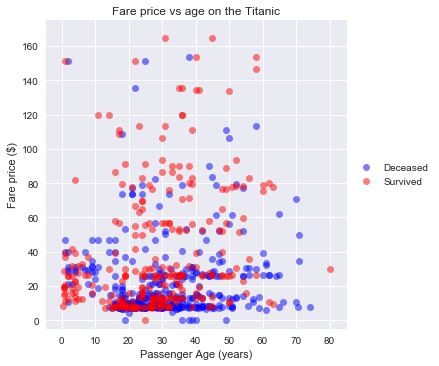

In [34]:
# use colour to represent whether the passenger survived or not
# will use the Seaborn module to generate this scatter plot
colour = ['b', 'r']
sns.lmplot(x='Age', y='Fare', hue='Survived', palette=colour, scatter_kws={'alpha':0.5}, legend=False, data=titanic_data, fit_reg=False)

# outliers omitted by defining the price range (y-axis) to be less than $175
plt.ylim(-5, 175)
plt.title('Fare price vs age on the Titanic')
plt.xlabel('Passenger Age (years)')
plt.ylabel('Fare price ($)')
plt.legend(['Deceased', 'Survived'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Note: Seaborn scatter plot argument info found in docs, see ref 9.

### Plot analysis:
This representation is much richer than the above plot. It can now clearly be seen that younger passengers (< 10 years old, and then a around 20 - 40) had a better chance of survival than older passengers.

However, it is quite difficult to tell whether fare price had an effect on survival rate due to the large overlap in the lower fare price range. The bar chart depicting the 'Class' survival rates illustrates that data more clearly.

## Question 3 conclusion
There does not appear to be any clear relation between the fare price paid and the age of the passenger. However, when combined with the survival data we can see that passengers that paid a higher fare price generally had a higher rate of survival. This corroborates with the 'class' analysis above.

# Question 4. Effect of siblings/spouses or having children on survival rate

Need to create a new column in the dataframe where passengers are grouped into either having a sibling/spouse, having children, having both, or having neither. Can then take average survivals from these sub-groups and plot a bar chart to illustrate any differences.

In [35]:
# group by siblings/spouse ('SibSp') and calculate the mean survival
sibling_spouse_survival = titanic_data.groupby('SibSp', as_index=False).mean()['Survived']

In [36]:
# group by parents/children ('Parch') and calculate the mean survival
parents_children_survival = titanic_data.groupby('Parch', as_index=False).mean()['Survived']

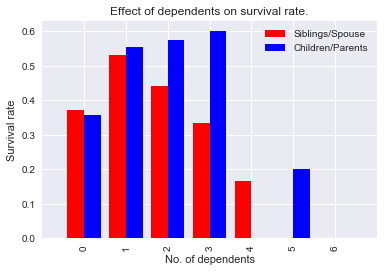

In [37]:
# plot bar chart of effect of number of dependents (i.e. siblings/spouse or children/parents) on survival rate

width = 0.4

sibling_spouse_survival.plot(kind='bar', color='red', width=width, position=1)
parents_children_survival.plot(kind='bar', color='blue', width=width, position=0)

plt.title('Effect of dependents on survival rate.')
plt.ylabel('Survival rate')
plt.xlabel('No. of dependents')
plt.xlim(-1,7)
plt.legend(['Siblings/Spouse', 'Children/Parents'])
plt.show()

Note: adapted code from ref 8.

## Plot analysis:
Not the most informative plot. However, it appears that people without dependents, and also people with several dependents (>= 4), were less likely to survive.
This may be a representation of the divide between poor/wealthy that relates to the study of survival based on 'class' shown above - namely, more independent passengers may be travelling in 3rd class.

## Question 4 conclusion
The siblings/spouse/children/parents ('dependents') analysis is appears complicated. However, we can see that solo passengers (no dependents) had a lower rate of survival than those with 1 or 2 dependents. It's anticipated that this may also be related to passenger 'Class' and/or fare price paid.

# Limitations
This is a relatively small dataset, and therefore some of the calculated mean values may be skewed by outliers. For example, the 'age_group' function generated no data points in the group 'elderly female'. This function could be re-worked to accommodate for this, but there would still be insufficient data to draw firm conclusions.

Another challenge for me personally was the scarcity of continuous variables available. Only the 'Age' and 'Fare' variables had a wide range of possible values. This made the choice of suitable plots more limited than it would otherwise be.

# Conclusions

The recurring theme found throughout the analysis was that survival rates were considerably higher for females and for younger aged passengers, particularly those in age groups classified as 'children' or 'infants'. This possibly reflects the classic emergency protocol of 'woman and children first' (as also depited in the movie!).

Another obvious trend was that it was far better to be a wealthy passenger in 1st (or 2nd) class, with a significantly higher proportion of survivors than the passengers in 3rd Class. This may have occurred due to preferential treatment when boarding life rafts etc, but may also have been due to the location on the ship of the respective cabins. For example, presumably the 3rd class passengers were in the lower decks, more suceptible to flooding during the sinking phase, while the upper decks housed those in the higher classes. The 'Cabin' data may provide an interesting aspect for analysis in this respect, particularly if combined with a layout/floorplan of the ship to determine which areas of the Titanic had the highest/lowest survival rates (and possibly reveal where the iceburg struck).

Lastly, these findings can not infer the cause of the correlations, as a rigorous statistical experiment has not been conducted.

### References:
1. https://stackoverflow.com/questions/38424459/set-y-axis-limit-in-pandas-histogram
2. http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.to_frame.html
3. https://pandas.pydata.org/pandas-docs/stable/merging.html
4. http://pandas.pydata.org/pandas-docs/version/0.13.1/groupby.html (groupby( ) docs)
5. http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-advanced-hierarchical (indexing hierarchical dataframes)
6. https://pythonspot.com/en/matplotlib-pie-chart/ (pie chart code)
7. https://chrisalbon.com/python/matplotlib_stacked_bar_plot.html (stacked bar chart)
8. https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis (dual bar chart)
9. https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot (Seaborn scatter plot docs)